# <FONT COLOR='bROWN'> AMAZON SALES ANALYSIS

In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the dataframe and setting the options to view full columns
df = pd.read_csv('/content/drive/MyDrive/Amazon Sale Report.csv')
pd.set_option('display.max_columns', None)

# displaying the first five rows
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,NaN,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [3]:
# meta information about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [4]:
# shape of the datase
df.shape

(128975, 24)

In [5]:
# viewing the null value count
df.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

In [6]:
# viewing the duplicate count
df.duplicated().sum()

0

### Data Cleaning

In [7]:
# dropping the unnecessary columns
df.drop(columns=['index','Unnamed: 22','fulfilled-by','promotion-ids'
                 ,'currency','ship-country','SKU','Order ID'],inplace=True)

In [8]:
# changing the column to title case
columns = df.columns.tolist()
df.columns = [' '.join(i.strip().title().split()) for i in columns]

In [9]:
# type casting the date from object to datetime
df['Date'] = pd.to_datetime(df['Date'])


In [10]:
# post type cast dropping the duplicates
df.drop_duplicates(inplace=True)
print("After dropping duplicates:", df.duplicated().sum())

After dropping duplicates: 0


In [11]:
# imputation of the amount column
print("Before Imputation Variance :", df['Amount'].var())
print()
df['Amount'] = df['Amount'].interpolate('linear')
print("After Imputation Variance :", df['Amount'].var())

Before Imputation Variance : 79142.46221465552

After Imputation Variance : 76909.42749345509


In [12]:
# imputing with mode value
df['Courier Status'] = df['Courier Status'].fillna(df['Courier Status'].mode()[0])

In [13]:
# dropping the null values
df.dropna(inplace=True)
print("Post Imputation and Dropping the Null Values :",df.isnull().sum())

Post Imputation and Dropping the Null Values : Date                  0
Status                0
Fulfilment            0
Sales Channel         0
Ship-Service-Level    0
Style                 0
Category              0
Size                  0
Asin                  0
Courier Status        0
Qty                   0
Amount                0
Ship-City             0
Ship-State            0
Ship-Postal-Code      0
B2B                   0
dtype: int64


### Whats the distribution of the Amount column

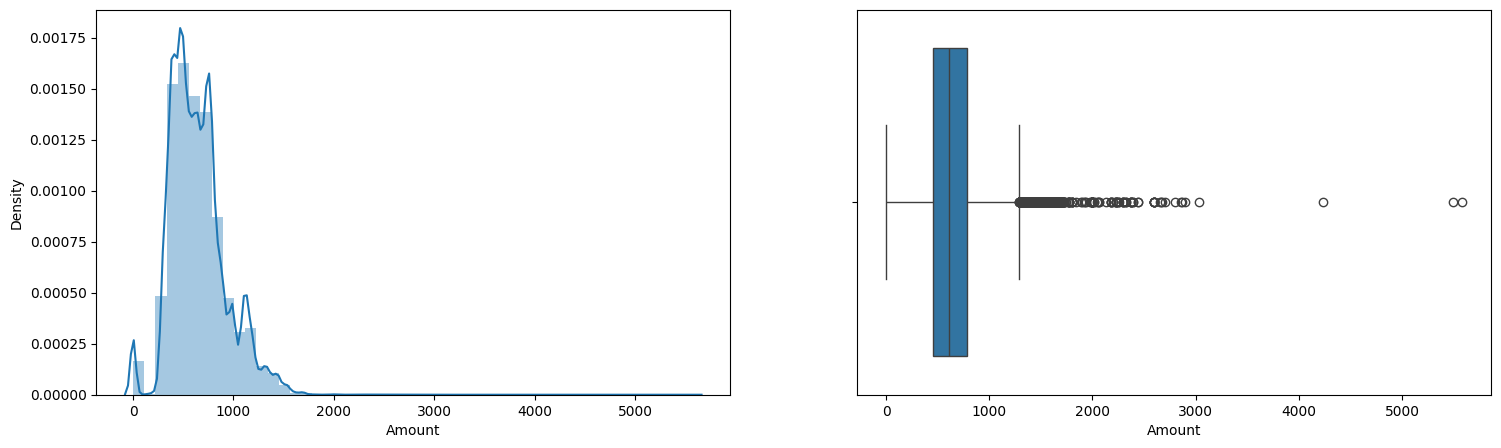

In [14]:
# adjusting the figure size for better visibility
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))

# plotting the distriution plot
sns.distplot(df['Amount'],ax=axes[0] )
sns.boxplot(x=df['Amount'], ax=axes[1])
plt.show()

`Observation`
- There is a peak small peak of upto 2500 rows which amount is Zero.
- The amount cannot be zero even after the discount the amount never will be zero
- Seems like there is a mistake in the data
- We are going to filter out the zero values

In [15]:
# filtering out zero values
df = df[df['Amount'] !=0]

### Whats the distribution of Purchace Quantity

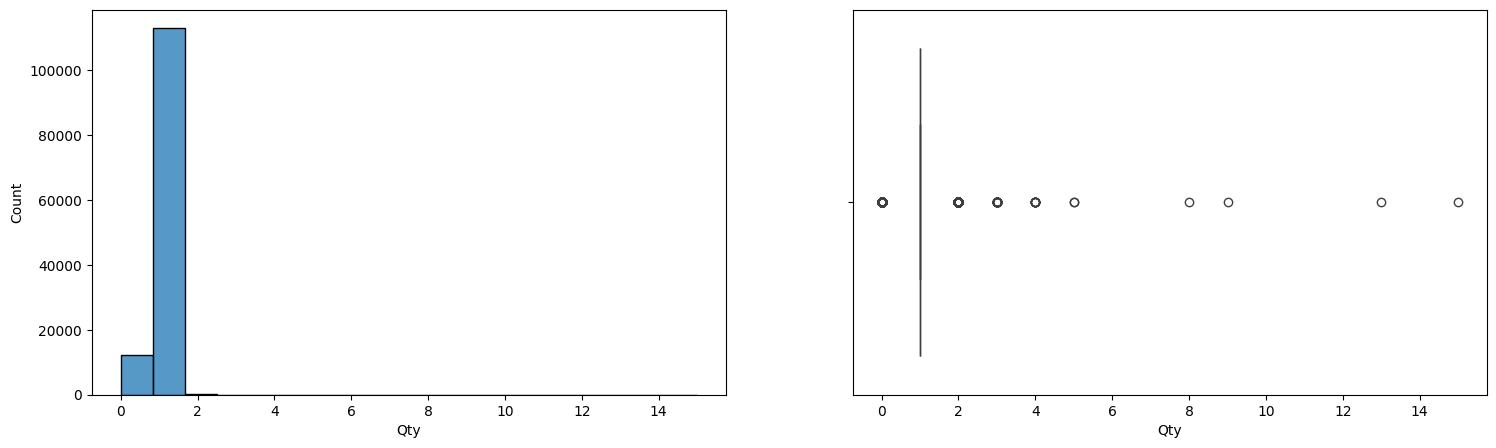

In [16]:
# adjusting the figure size for better visibilit
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))

# plotting the histogram
sns.histplot(df['Qty'],ax=axes[0] )
sns.boxplot(x=df['Qty'], ax=axes[1])
plt.show()

`Observation`
- There is a peak small peak of upto 12000 rows which Quantity is Zero.
- The Purchase Quantity cannot be zero.
- If it's zero, there will not be any billing
- Seems like there is a mistake in the data
- We are going to filter out the zero values

In [17]:
# filtering out the zero values
df = df[df['Qty'] !=0]

### What is the distribution of the Couriers Status?

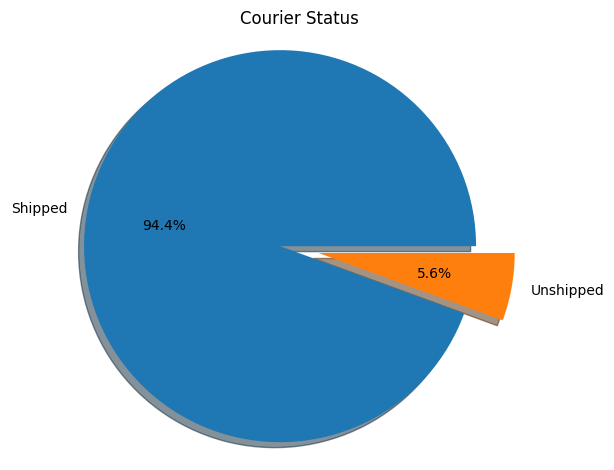

In [61]:
# extracting the count of the values
courier_status = df['Courier Status'].value_counts()

#plotting the pie chart automatic percentage
plt.pie(courier_status, labels=courier_status.index,
        autopct='%1.1f%%',shadow=True, explode= (0,0.2))
plt.axis('equal')
plt.title('Courier Status')
plt.tight_layout()
plt.show()

`Observation`
- 94.4 of orders are shipped successfully
- Only 5.6 of orders are not shipped due to several reasons
- Could be any reason for Not ablt to ship the products
- Let's explore more to find out the exact reason for Unshipping

### Whats the exact reason for not shipping the products?

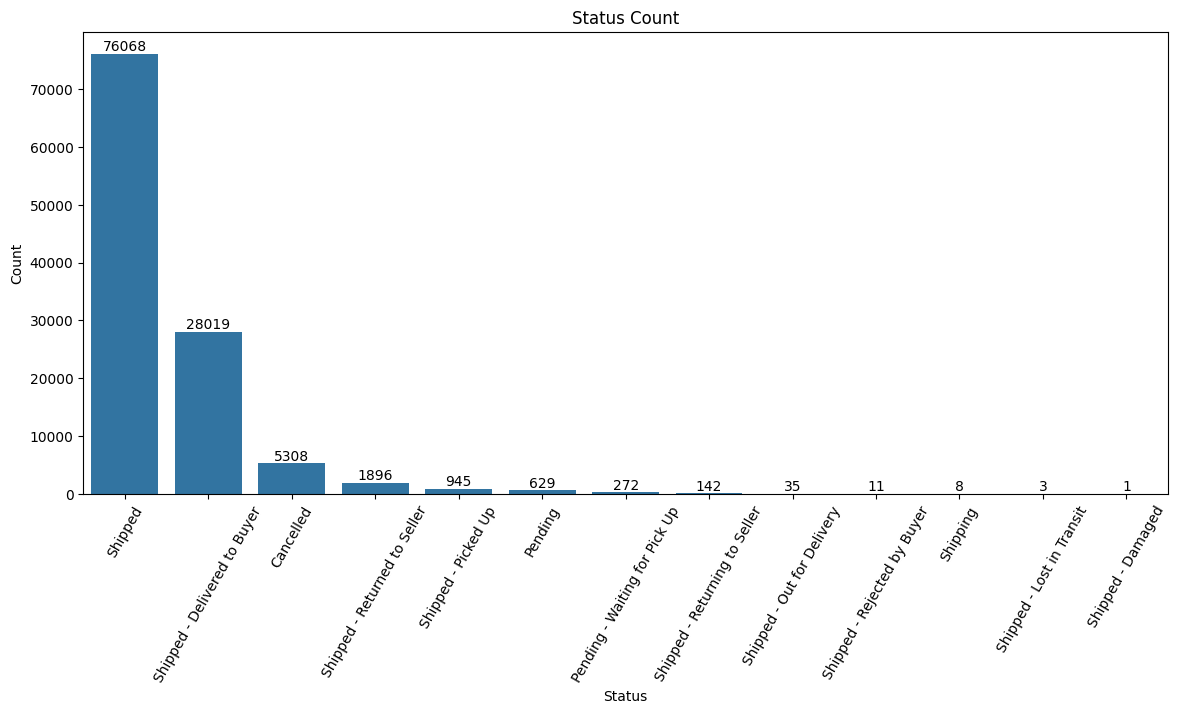

In [19]:
# extracting the status count
ship_status = df['Status'].value_counts().reset_index()

#adjusting the figure sixe for better visiblity
plt.figure(figsize=(14,6))
#plotting barplot
ax = sns.barplot(x='Status', y='count', data=ship_status)
for i in ax.containers:
  ax.bar_label(i)
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Status Count')
plt.xticks(rotation=60)
plt.show()

`Observation`
- From the above graph, we can understand that, 28k shipments are delivered to buyers successfully
- around 5k shipments are cancelled
- Others are due to other reasons above shown in the graph
- Only one shipment is damaged, we can understand how safety standards are maintained.

### What is the Value Disribution of FulFilment?

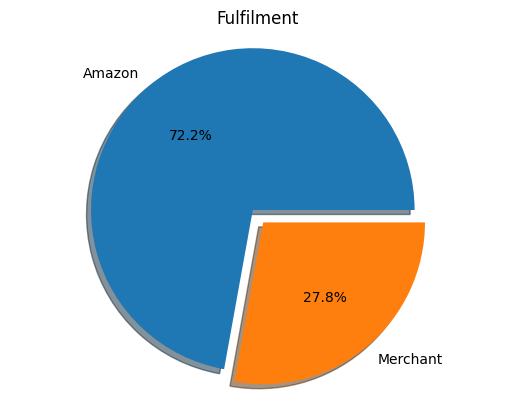

In [20]:
# extracting the value count
fulfilment = df['Fulfilment'].value_counts()

#plotting the pie chart
plt.pie(fulfilment, labels=fulfilment.index,
        autopct='%1.1f%%',shadow=True, explode=(0,0.1))
plt.axis('equal')
plt.title('Fulfilment')
plt.show()

`Observation`: From the above the chart we can understand Amazon dominates the fulfilment by 72.2% and merchant is by 27.8%

### Value distribution of ship service level

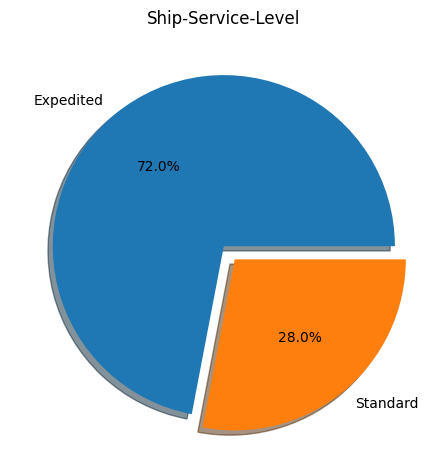

In [21]:
# extarcting the value counts
Ship_service = df['Ship-Service-Level'].value_counts()

#plotting the pie chart
plt.pie(Ship_service, labels=Ship_service.index,
        autopct='%1.1f%%',shadow=True, explode=(0,0.1))
plt.title('Ship-Service-Level')
plt.tight_layout()
plt.show()

`Observation`: from the above pie chart, we can understand that, Expedited shipment service has a distribution of 72% and standard shipment service is 28%

### What is the state count distribution?

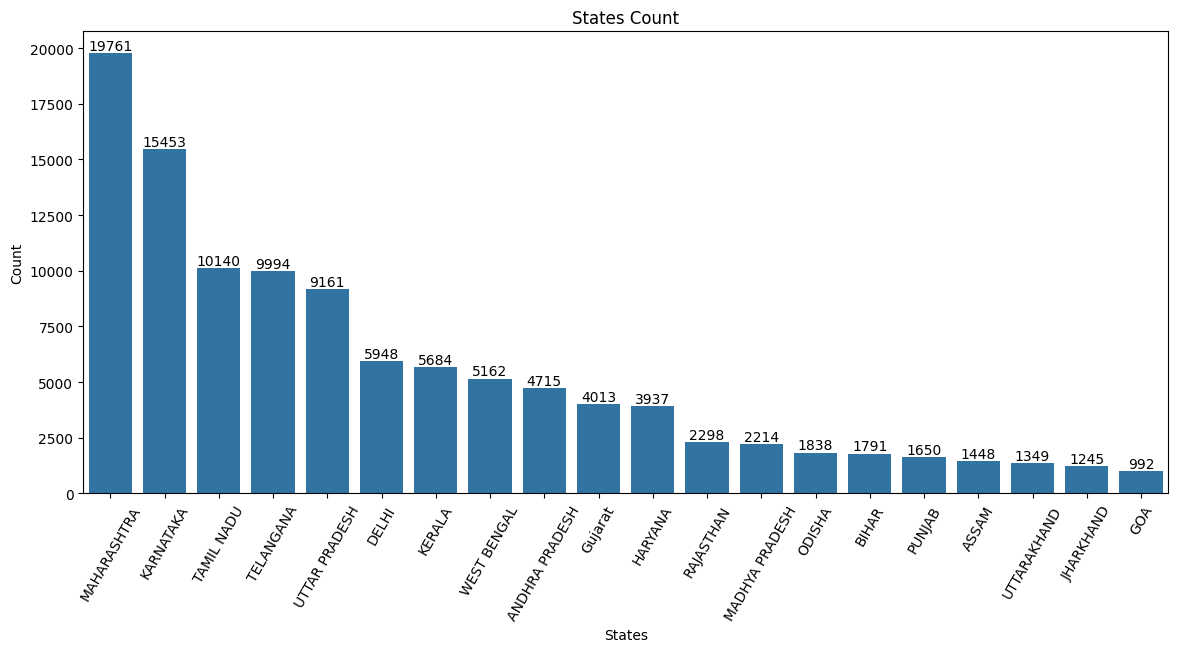

In [22]:
# extracting the top 10 states counts
states = df['Ship-State'].value_counts().nlargest(20)

#adjusting the figure size
plt.figure(figsize=(14,6))

# plotting the bar chart
ax = sns.barplot(x=states.index, y=states.values)
for i in ax.containers:
  ax.bar_label(i)
plt.xlabel('States')
plt.ylabel('Count')
plt.title('States Count')
plt.xticks(rotation=60)
plt.show()

`Observation`:
- Maharastra is dominating in the orders, followed by Karnatka and Tamil Nadu
- Least in this top ten is goa. obviously goa has less population

### What is the city count distribution?

In [58]:
# Replacing the duplicates with converting all into title case
df['Ship-City'] = df['Ship-City'].str.title()

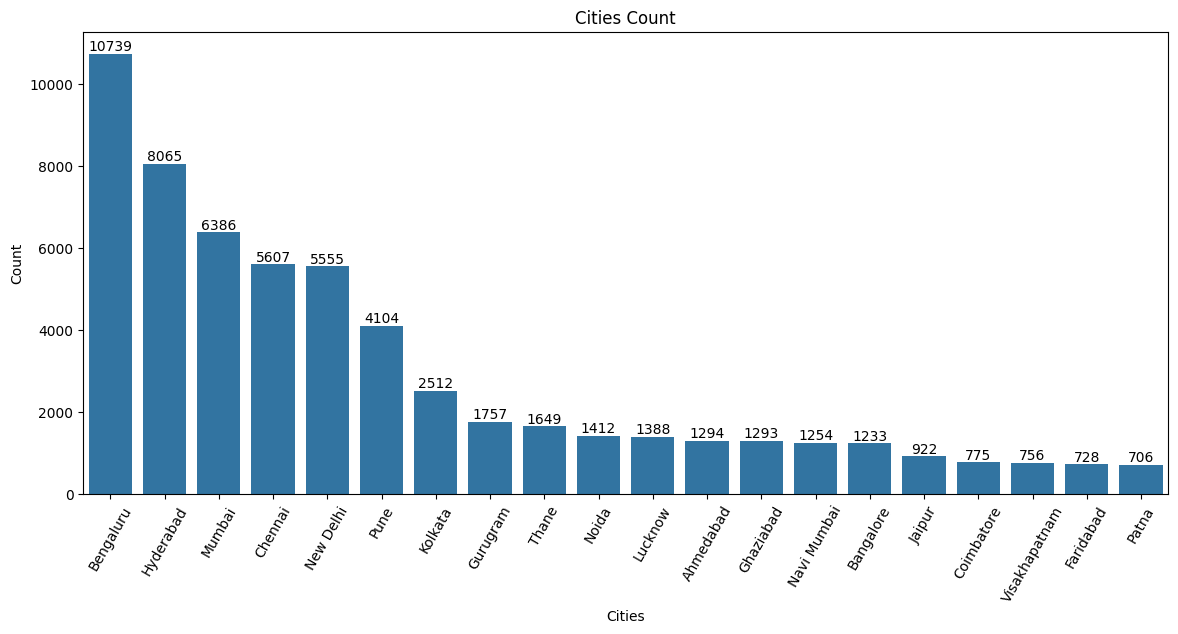

In [59]:
# extractng the city distribution
cities = df['Ship-City'].value_counts().nlargest(20)

# adjusting the figure for better visibility
plt.figure(figsize=(14,6))
# plotting the barplot
ax = sns.barplot(x=cities.index, y=cities.values)
for i in ax.containers:
  ax.bar_label(i)
plt.xlabel('Cities')
plt.ylabel('Count')
plt.title('Cities Count')
plt.xticks(rotation=60)
plt.show()

`Observation`:
- Bengaluru is has highest count in all other cities. followed by hyderabad and mumbai.
- Patna has the least city count

### Category distribution

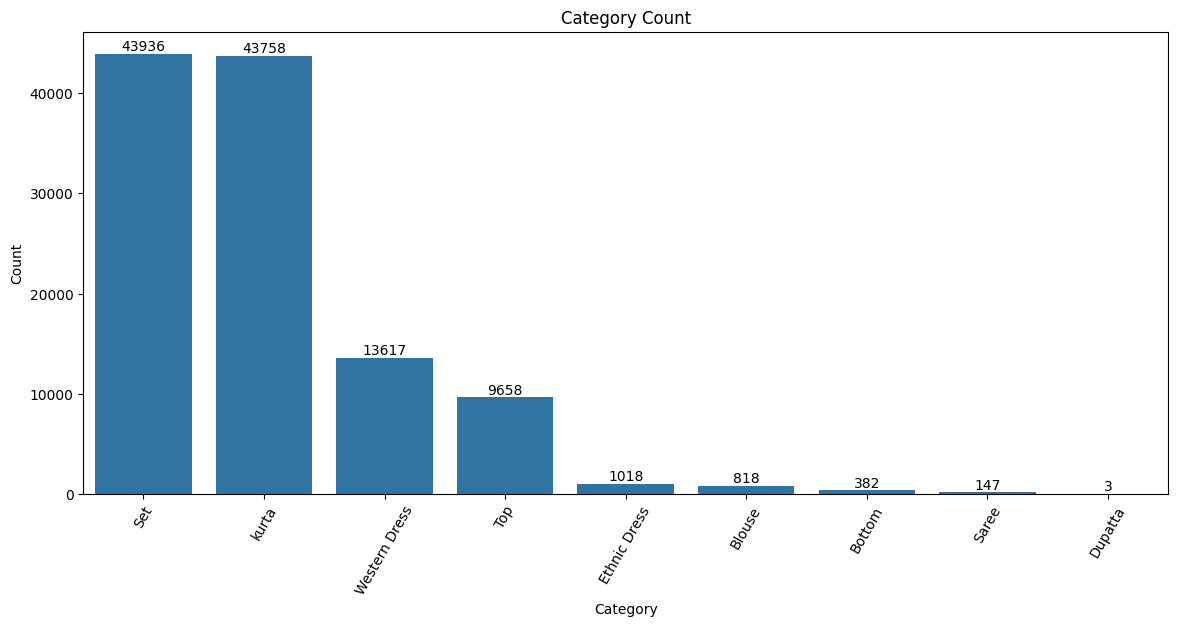

In [24]:
# extracting the category count
Category = df['Category'].value_counts().reset_index()

#adjusting the fighure size for better visibility
plt.figure(figsize=(14,6))
# plotting the bar plot
ax = sns.barplot(x='Category', y='count', data=Category)
for i in ax.containers:
  ax.bar_label(i)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category Count')
plt.xticks(rotation=60)
plt.show()

`Observation`: Set has highest count has highest distribution and followed by kurta and western dress.
- Least count is dupatta with only three shipments

### What are the monthly sales trends over the past year?

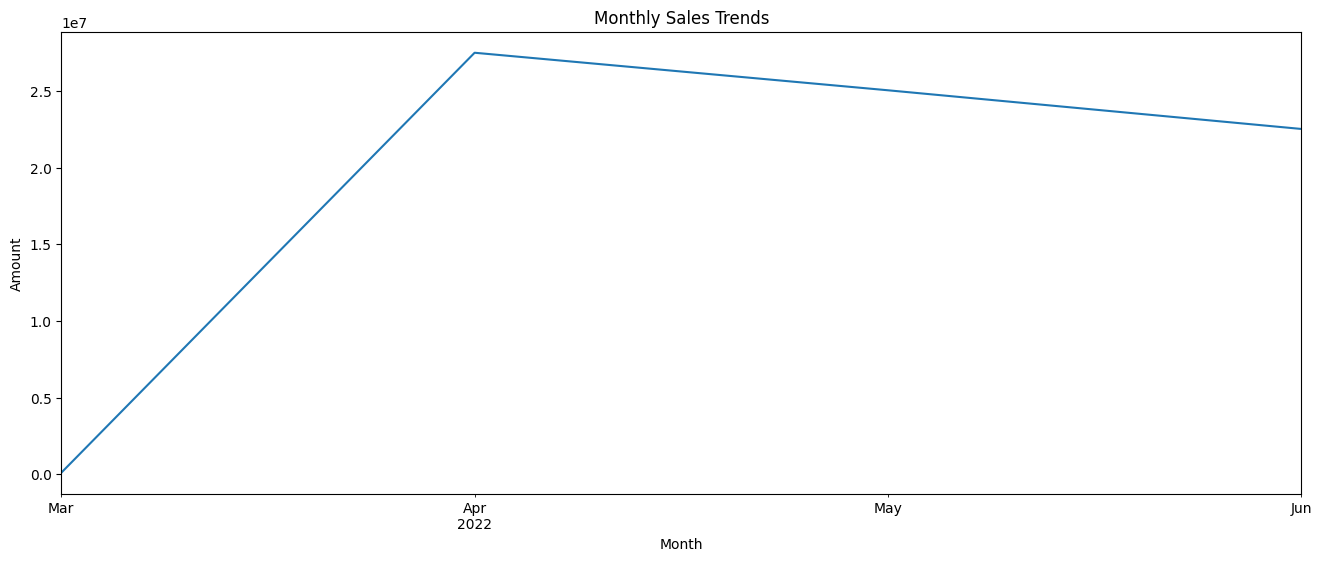

In [25]:
# Converting the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extracting the month from the 'Date' column
df['Month'] = df['Date'].dt.to_period('M')

# Grouping by 'Month' and summing the 'Amount'
monthly_sales = df.groupby('Month')['Amount'].sum()

# Plotting the monthly sales trends
monthly_sales.plot(kind='line', figsize=(16, 6))
plt.xlabel('Month')
plt.ylabel('Amount')
plt.title('Monthly Sales Trends')
plt.show()

`Observation`: There is a rise in march month and highest peak in april. slowly began to fall till june.
- We have only 4 months data so, its difficult to understand the pattern.
- The rise could be because of festivals

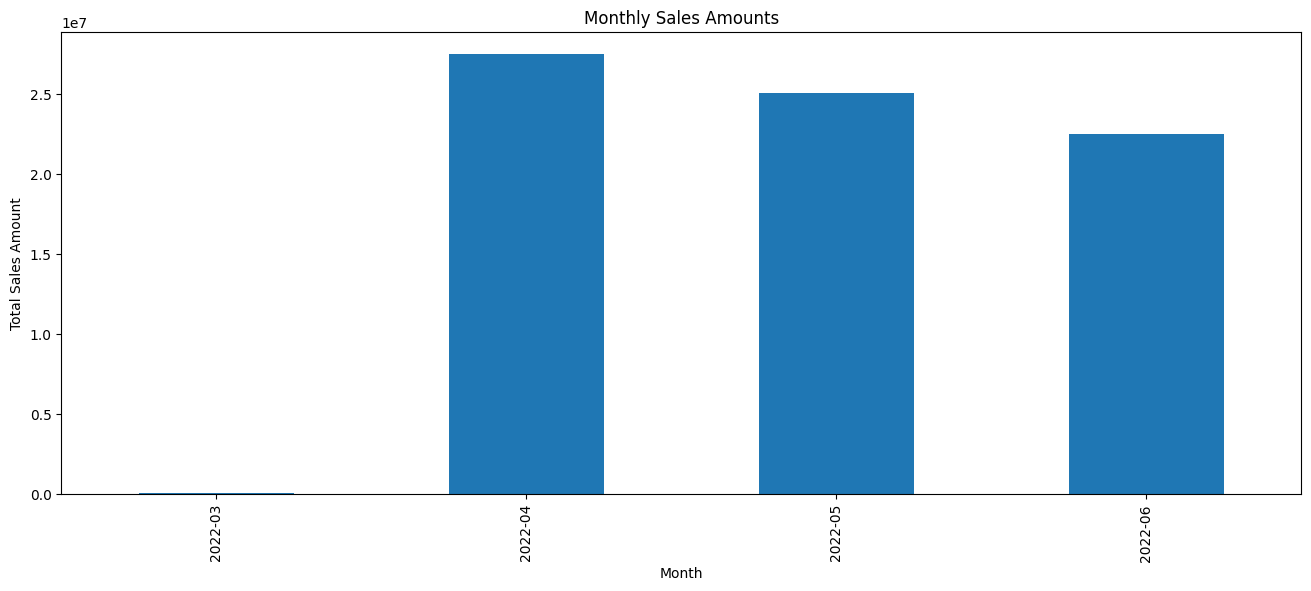

The month with the highest sales is 2022-04 with an amount of 27493472.841666665.


In [26]:
# Grouping by 'Month' and summing the 'Amount'
monthly_sales = df.groupby('Month')['Amount'].sum()

# Plotting the monthly sales in a bar plot
monthly_sales.plot(kind='bar', figsize=(16, 6))
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.title('Monthly Sales Amounts')
plt.show()

# Printing the month with the highest sales
max_sales_month = monthly_sales.idxmax()
max_sales_amount = monthly_sales.max()
print(f"The month with the highest sales is {max_sales_month} with an amount of {max_sales_amount}.")

### Which are the top 10 products by revenue?

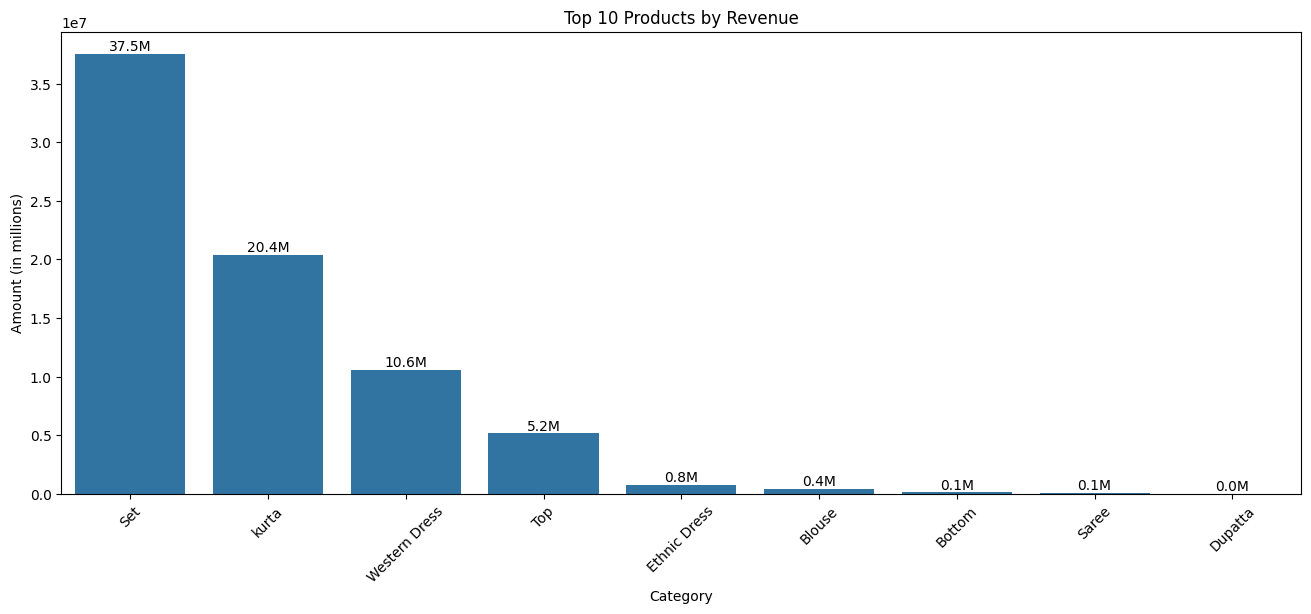

In [27]:
# Grouping by 'Category' and summing the 'Amount'
category = df.groupby('Category')['Amount'].sum().reset_index().sort_values(by='Amount', ascending=False)

# Creating the bar plot for the top 10 products by revenue
plt.figure(figsize=(16, 6))
ax = sns.barplot(x='Category', y='Amount', data=category.head(10))

# Formatting the data labels in millions
for container in ax.containers:
    ax.bar_label(container, labels=[f'{x/1e6:.1f}M' for x in container.datavalues])

# Setting the labels and title
plt.xlabel('Category')
plt.ylabel('Amount (in millions)')
plt.title('Top 10 Products by Revenue')
plt.xticks(rotation=45)

# Displaying the plot
plt.show()

`Observations`
- The highest revenue generating product is set and followed by kurta and western dress
- This indicates these products are bought for festivals like Ugadi
- Set generate a revenue of 37.5 Million India Rupees
- Kurta has generated 20.4 Million Indian Rupees

### Which are the top 10 products by quantity sold?

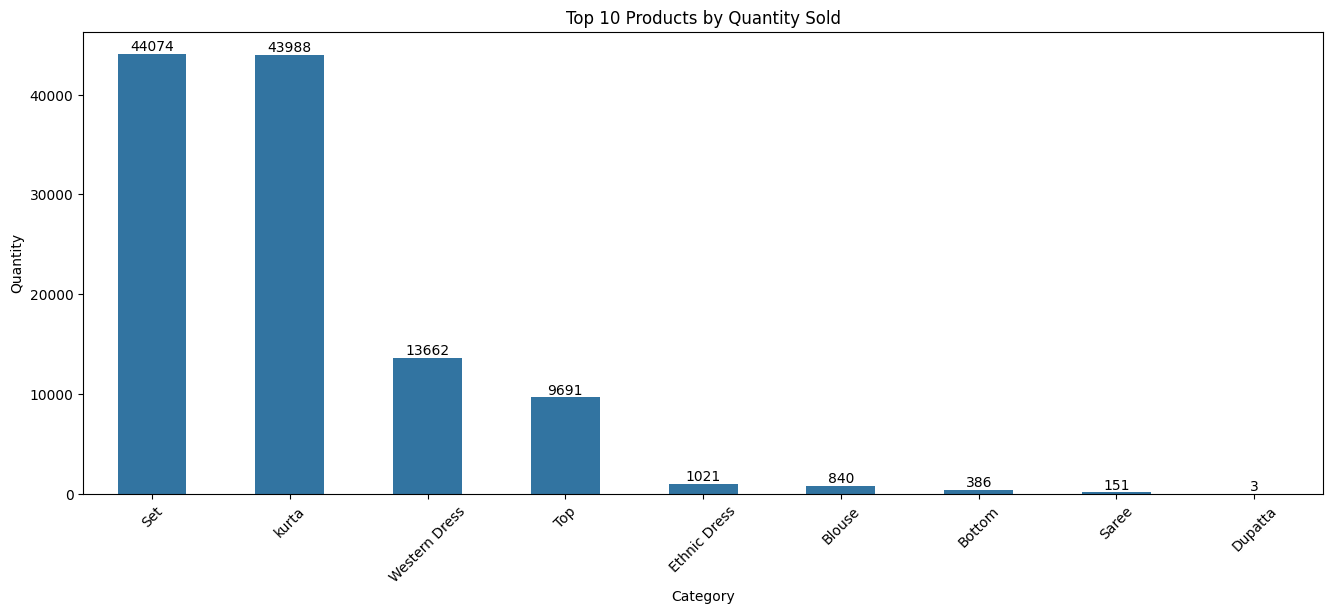

In [28]:
# grouping the top 10 categories
qty = df.groupby('Category')['Qty'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(16, 6))
ax = sns.barplot(x='Category', y='Qty', data=qty, width=0.5)
for i in ax.containers:
  ax.bar_label(i)
plt.xlabel('Category')
plt.ylabel('Quantity')
plt.title('Top 10 Products by Quantity Sold')
plt.xticks(rotation=45)
plt.show()

`Observation`
- 44k sets are sold and followed by kurta 43k
- Only three dupatta proucts are sold

## Order and Fulfillment
### What is the fulfillment status distribution of all orders?

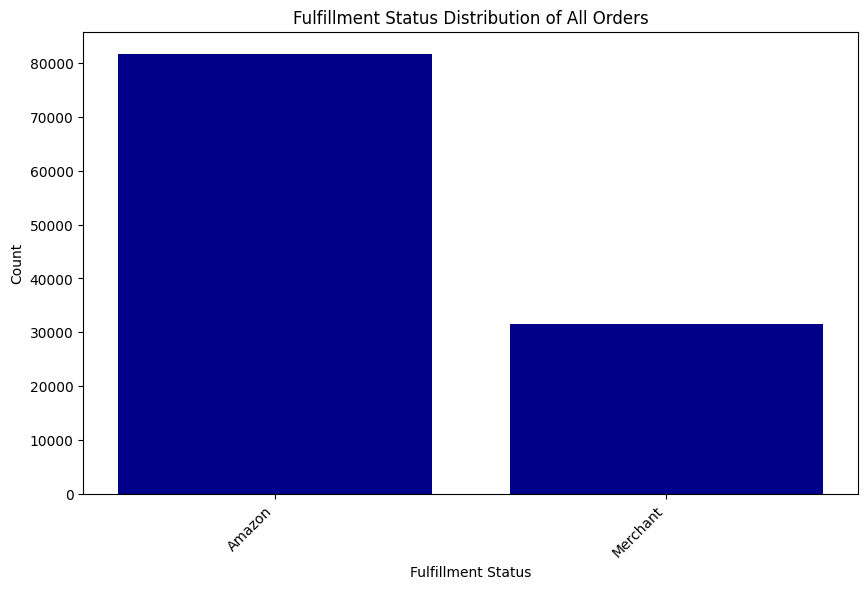

In [30]:
fulfillment_status_distribution = df['Fulfilment'].value_counts().reset_index()

# Rename the columns for clarity
fulfillment_status_distribution.columns = ['Fulfilment_Status', 'Count']

plt.figure(figsize=(10, 6))
plt.bar(fulfillment_status_distribution['Fulfilment_Status'], fulfillment_status_distribution['Count'], color='Darkblue')
plt.xlabel('Fulfillment Status')
plt.ylabel('Count')
plt.title('Fulfillment Status Distribution of All Orders')
plt.xticks(rotation=45, ha='right')
plt.show()

`observation`: Around 80k products are of Amazon's and 30k products are of Merchats

### What are the average order sizes (quantity and amount) over time?

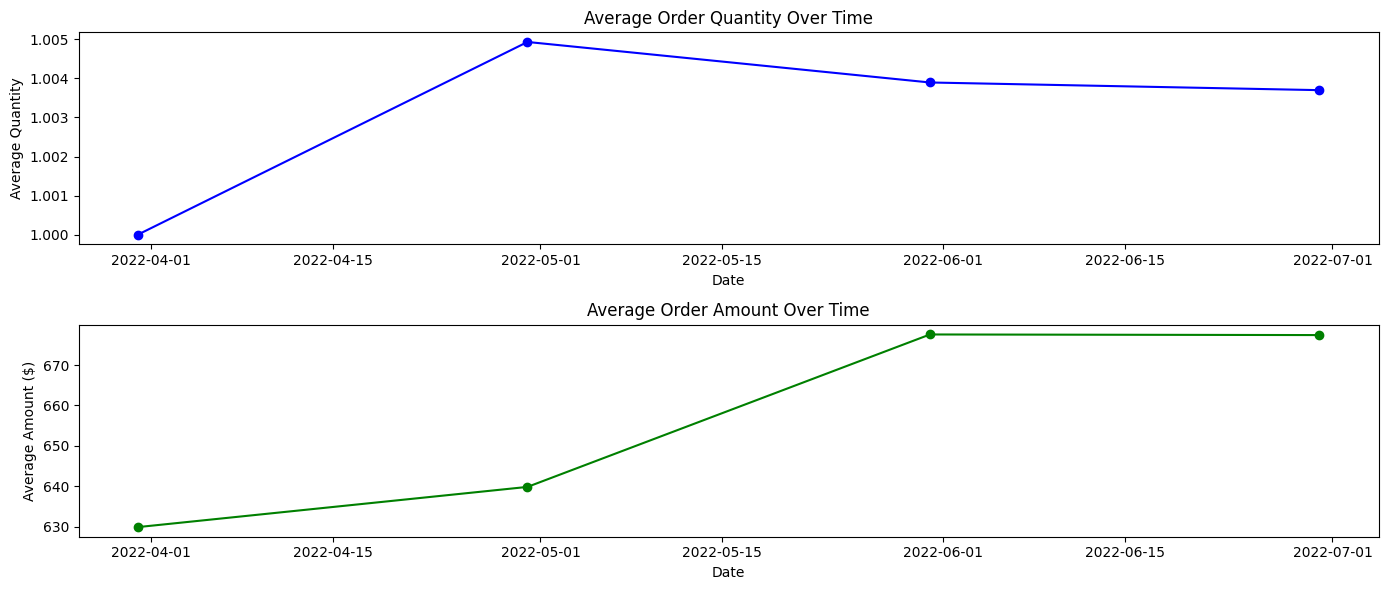

In [31]:
df.set_index('Date', inplace=True)

# Resample data by month and calculate average quantity and amount
average_order_sizes = df.resample('M').agg({'Qty': 'mean', 'Amount': 'mean'}).reset_index()

# Rename columns for clarity
average_order_sizes.columns = ['Date', 'Average_Quantity', 'Average_Amount']

plt.figure(figsize=(14, 6))

# Average Quantity
plt.subplot(2, 1, 1)
plt.plot(average_order_sizes['Date'], average_order_sizes['Average_Quantity'], marker='o', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Average Quantity')
plt.title('Average Order Quantity Over Time')

# Average Amount
plt.subplot(2, 1, 2)
plt.plot(average_order_sizes['Date'], average_order_sizes['Average_Amount'], marker='o', linestyle='-', color='g')
plt.xlabel('Date')
plt.ylabel('Average Amount ($)')
plt.title('Average Order Amount Over Time')

plt.tight_layout()
plt.show()

`Observation`:
- From the above graphs, we can undestand that average order quantity was peak in April to may.
- But the order amount was higher after june and became constant
- It might be because of the offers during the festival season

### Which cities and states have the highest sales volumes?



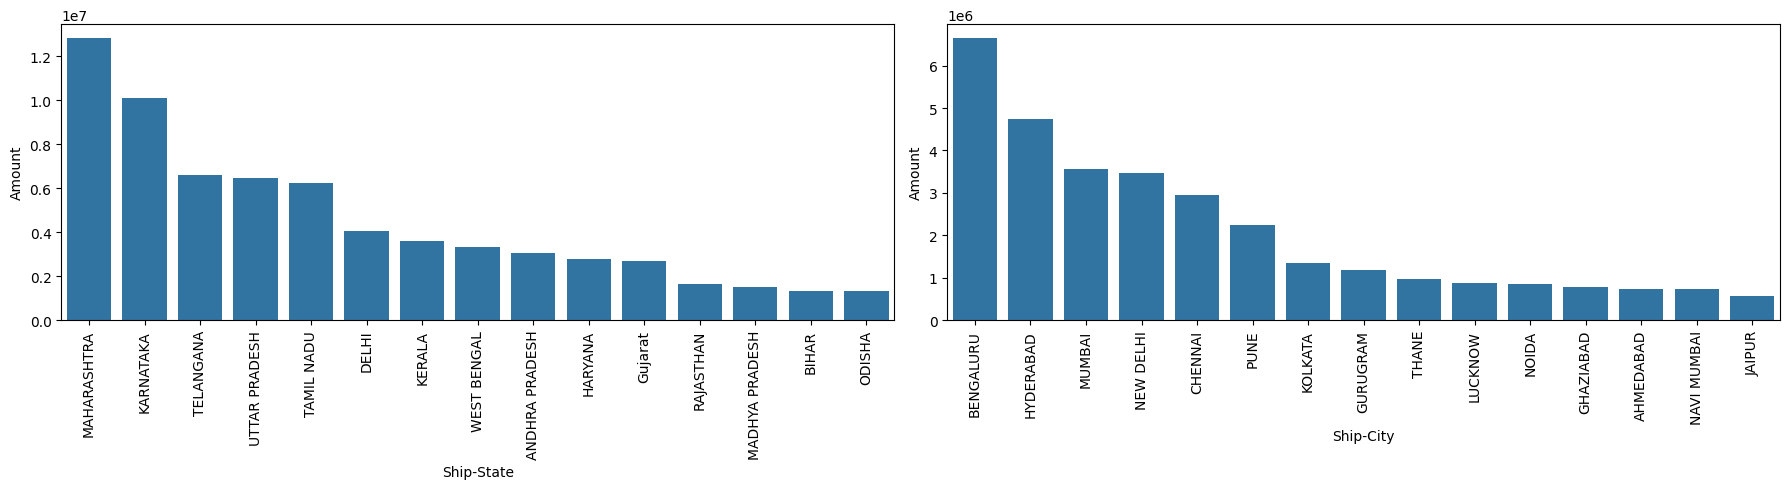

In [32]:
# grouping the states acording to the total amount
states = df.groupby('Ship-State')['Amount'].sum().nlargest(15).reset_index()
# grouping the cities acording to the total amount
cities = df.groupby('Ship-City')['Amount'].sum().nlargest(15).reset_index()

#adjusting the figure for better vsisibility
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))

#plotting the barplots
ax1 = sns.barplot(x='Ship-State', y='Amount', data=states, ax=axes[0])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax2 = sns.barplot(x='Ship-City', y='Amount', data=cities, ax=axes[1])
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

`Observation`
- Maharastra and karnataka has highest sales volumes
- least is odisha
- Banglore and hyderabad has highest sales volume cities
- Least sales volume city is Jaipur

### How does the sales performance differ between B2B and B2C channels?

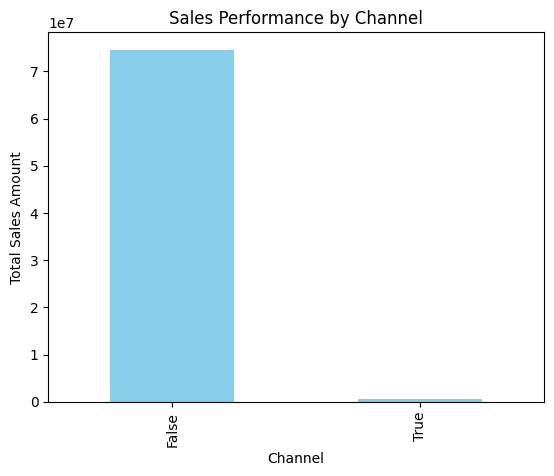

In [33]:
# plotting the barplot
df.groupby('B2B')['Amount'].sum().plot(kind='bar', color='skyblue')
plt.xlabel('Channel')
plt.ylabel('Total Sales Amount')
plt.title('Sales Performance by Channel')
plt.show()

`observation`
- B2B is the most dominating sales channel than B2C
- Around 90% sales is from B2B

### What are the average price across different categories?


Text(0, 0.5, 'Average Price')

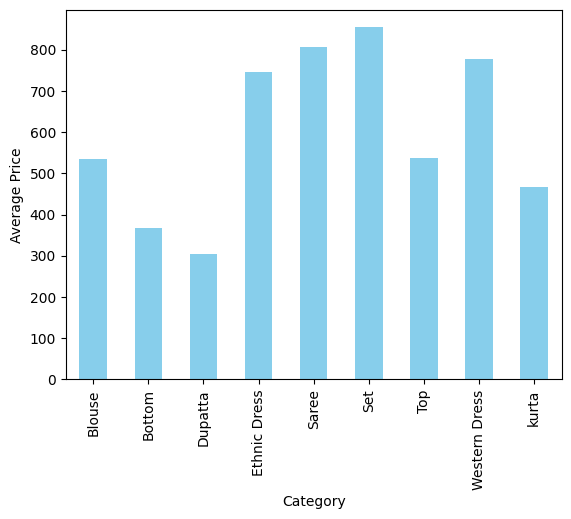

In [34]:
# plotting the bar plot
df.groupby('Category')['Amount'].mean().plot(kind='bar', color='skyblue')
plt.xlabel('Category')
plt.ylabel('Average Price')

`Observation`
- Average price is higest in sets which is around 900.
- 900 for a set is actually cheaper that's why it is most bought item in the data
- Kurta is around 400-500 which make it cheaper too
- A saree for 700-800 is cheap too but it is not preferred. Maybe because of comprise in quality

### What are the sales trends for different product sizes?

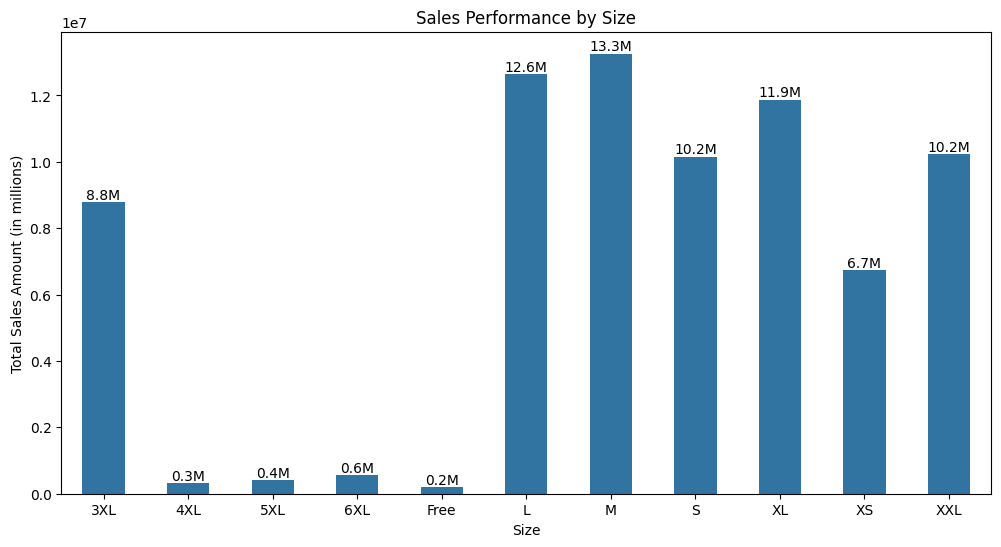

In [35]:
# Grouping by 'Size' and summing the 'Amount'
sizes = df.groupby('Size')['Amount'].sum().reset_index()

# Creating the bar plot for sales performance by size
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Size', y='Amount', data=sizes, width=0.5)

# Formatting the data labels in millions
for container in ax.containers:
    ax.bar_label(container, labels=[f'{x/1e6:.1f}M' for x in container.datavalues])

# Setting the labels and title
plt.xlabel('Size')
plt.ylabel('Total Sales Amount (in millions)')
plt.title('Sales Performance by Size')

# Displaying the plot
plt.show()

`Observation`
- Medium size is most bought, which generated a sale amount of 13.3 millions followed by 12.6 millions
- It shows us the customer preference

### Can we identify customer segments based on purchase behavior?


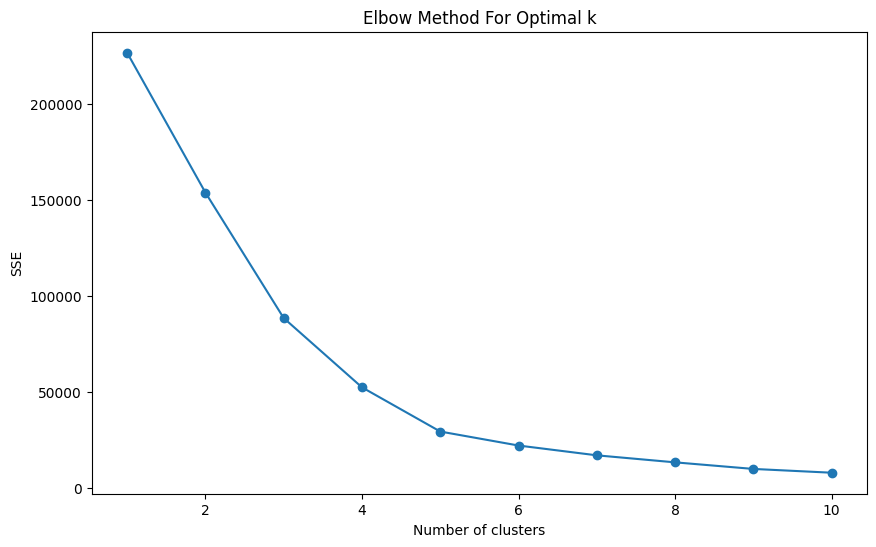

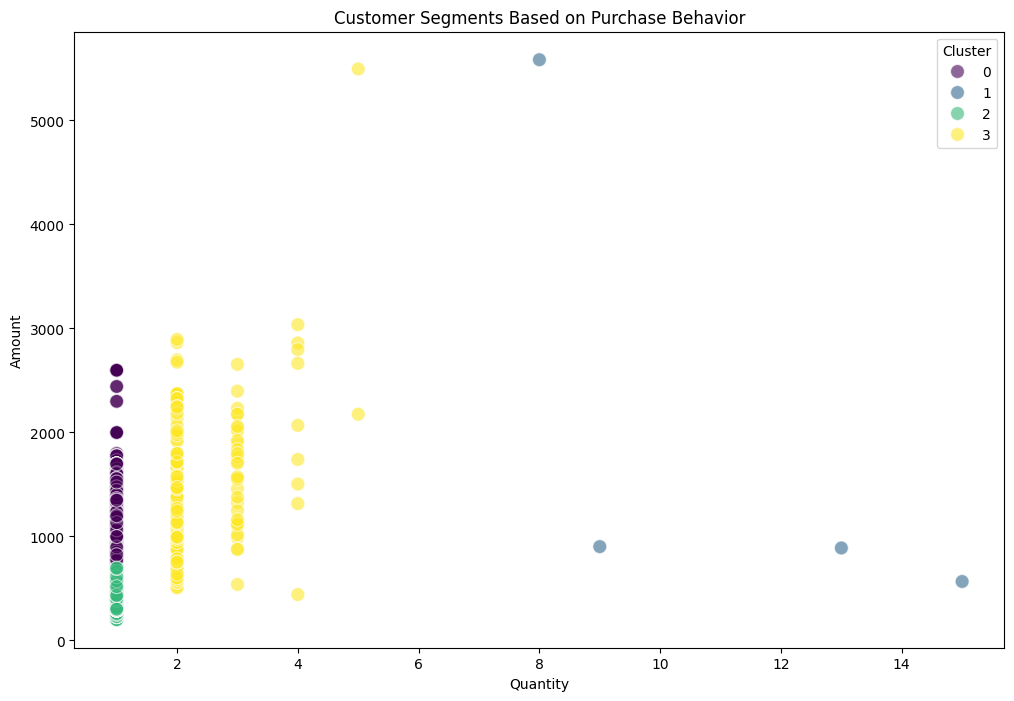

In [36]:
# selecting the correct feature
features = df[['Qty', 'Amount']]
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow method to find optimal number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11, ), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()

# Fit KMeans with optimal number of clusters (e.g., k=4)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# visualizing the data

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Qty', y='Amount', hue='Cluster', palette='viridis', s=100, alpha=0.6, edgecolor='w')
plt.title('Customer Segments Based on Purchase Behavior')
plt.xlabel('Quantity')
plt.ylabel('Amount')
plt.legend(title='Cluster')
plt.show()


`Observation`
- From the above graph, we can understand most of the customers but only one quantity.
- There are only few scatters of most purchased quantity upto 14-15 must be resellers.
- The large portion of the cutomers distriution is around 1-4
- And most of the customers purchased for about 3000 INR, only few customer who purhcase for above 5000 INR
- Interestlingly csutomers who purchased 14 items costed only under 1000 rupees

### Which Products are returned ?

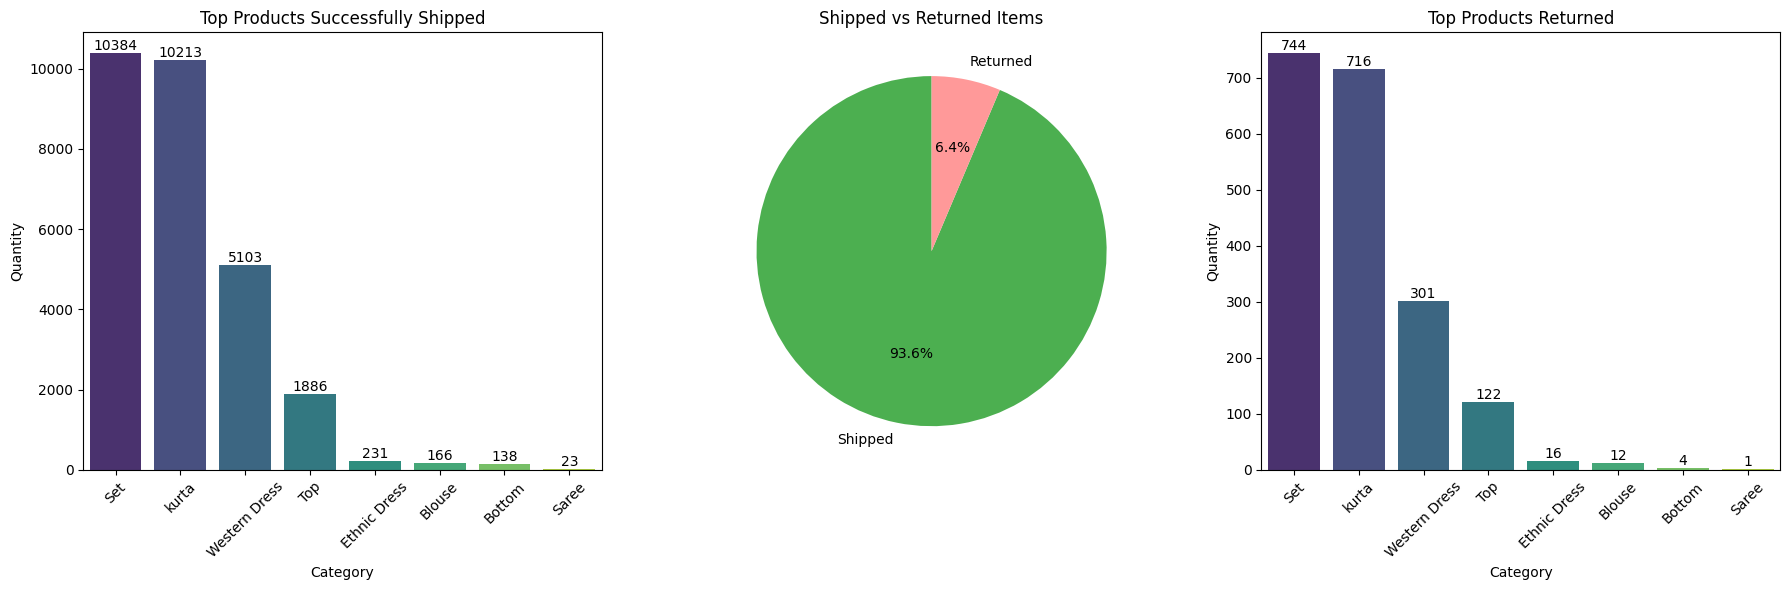

In [45]:
# Filter out the shipped and returned products
shipped = df[df['Status'] == 'Shipped - Delivered to Buyer']
returned = df[df['Status'] == 'Shipped - Returned to Seller']

# Calculate shipped items per category
shipped_items = shipped.groupby('Category')['Qty'].sum().sort_values(ascending=False).reset_index()

# Calculate returned items per category
returned_items = returned.groupby('Category')['Qty'].sum().sort_values(ascending=False).reset_index()

# Calculate total shipped and returned quantities for the pie plot
total_shipped = shipped['Qty'].sum()
total_returned = returned['Qty'].sum()

# Pie chart data
pie_labels = ['Shipped', 'Returned']
pie_sizes = [total_shipped, total_returned]
pie_colors = ['#4CAF50', '#FF9999']

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Barplot of products successfully shipped
sns.barplot(x='Category', y='Qty', data=shipped_items, ax=axes[0], palette='viridis')
axes[0].set_title('Top Products Successfully Shipped')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Quantity')
axes[0].tick_params(axis='x', rotation=45)
for container in axes[0].containers:
    axes[0].bar_label(container)

# Plot 2: Pie chart of shipped vs returned
axes[1].pie(pie_sizes, labels=pie_labels, colors=pie_colors, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Shipped vs Returned Items')

# Plot 3: Barplot of products returned
sns.barplot(x='Category', y='Qty', data=returned_items, ax=axes[2], palette='viridis')
axes[2].set_title('Top Products Returned')
axes[2].set_xlabel('Category')
axes[2].set_ylabel('Quantity')
axes[2].tick_params(axis='x', rotation=45)
for container in axes[2].containers:
    axes[2].bar_label(container)

# Adjust layout
plt.tight_layout()
plt.show()


`Observation`
- From the above graph we can understand that Set is highest returned item followed by Kurtas
- Least returned item is Saree.
- The Purchase rate is higher in kurtas than Sets. But returned rate is lower in kurtas
- This shows customers are satisfied with kurtas than sets.
- Among the purchase Quantity only 6.5% is returned rate. This displays customer satisfaction for the platform
- Let's eplore more to find out the what are the other reasons for the return rate

### Which state and city has highest return rate

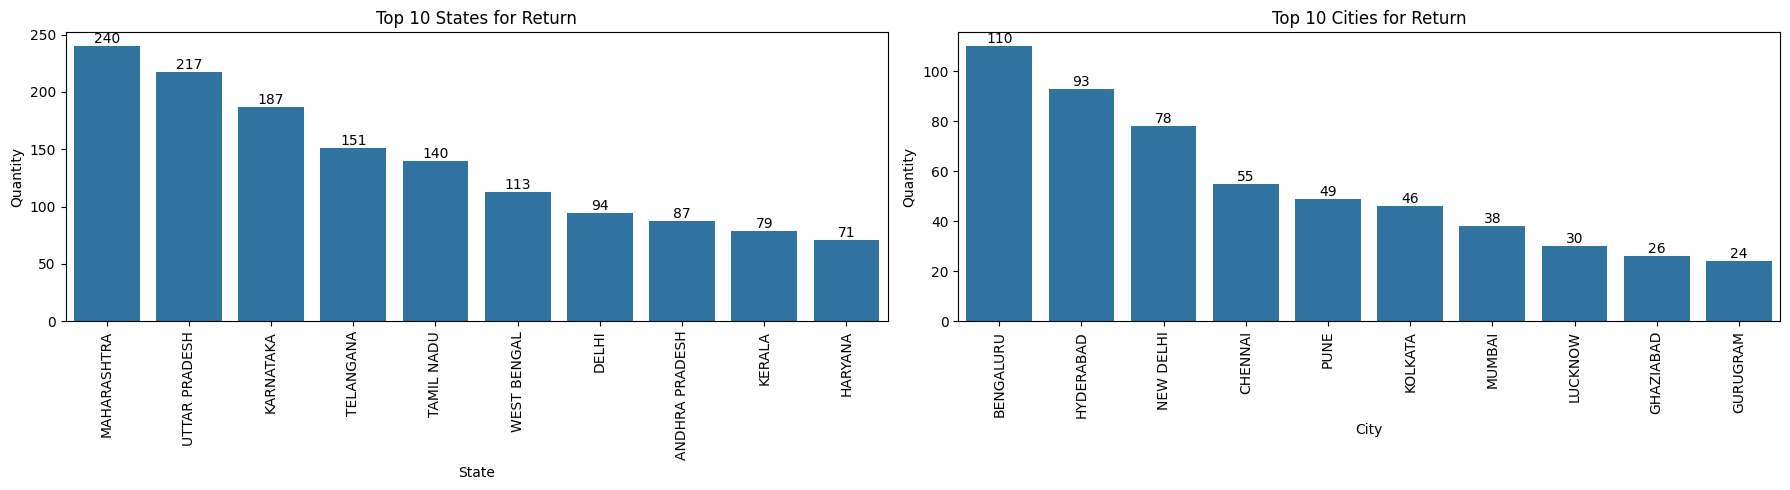

In [38]:
return_state = returned.groupby('Ship-State')['Qty'].sum().nlargest(10).reset_index()
return_city = returned.groupby('Ship-City')['Qty'].sum().nlargest(10).reset_index()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))
sns.barplot(x='Ship-State', y='Qty', data=return_state, ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].set_title('Top 10 States for Return')
axes[0].set_xlabel('State')
axes[0].set_ylabel('Quantity')
for i in axes[0].containers:
  axes[0].bar_label(i)

sns.barplot(x='Ship-City', y='Qty', data=return_city, ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].set_title('Top 10 Cities for Return')
axes[1].set_xlabel('City')
axes[1].set_ylabel('Quantity')
for i in axes[1].containers:
  axes[1].bar_label(i)
plt.tight_layout()
plt.show()

`Observation`
- From the above graph, we an understand Maharastra is the highest returning State, followed by Uttar Pradesh
- Least state is haryana in this top ten list.
- Highest returning city is banglore followed by Hyderabad
- these two are IT cities, so the purchase orders are maybe ordered by IT employees
- Let's explore more to find out about the return rate

### Which sizes are returned the most?

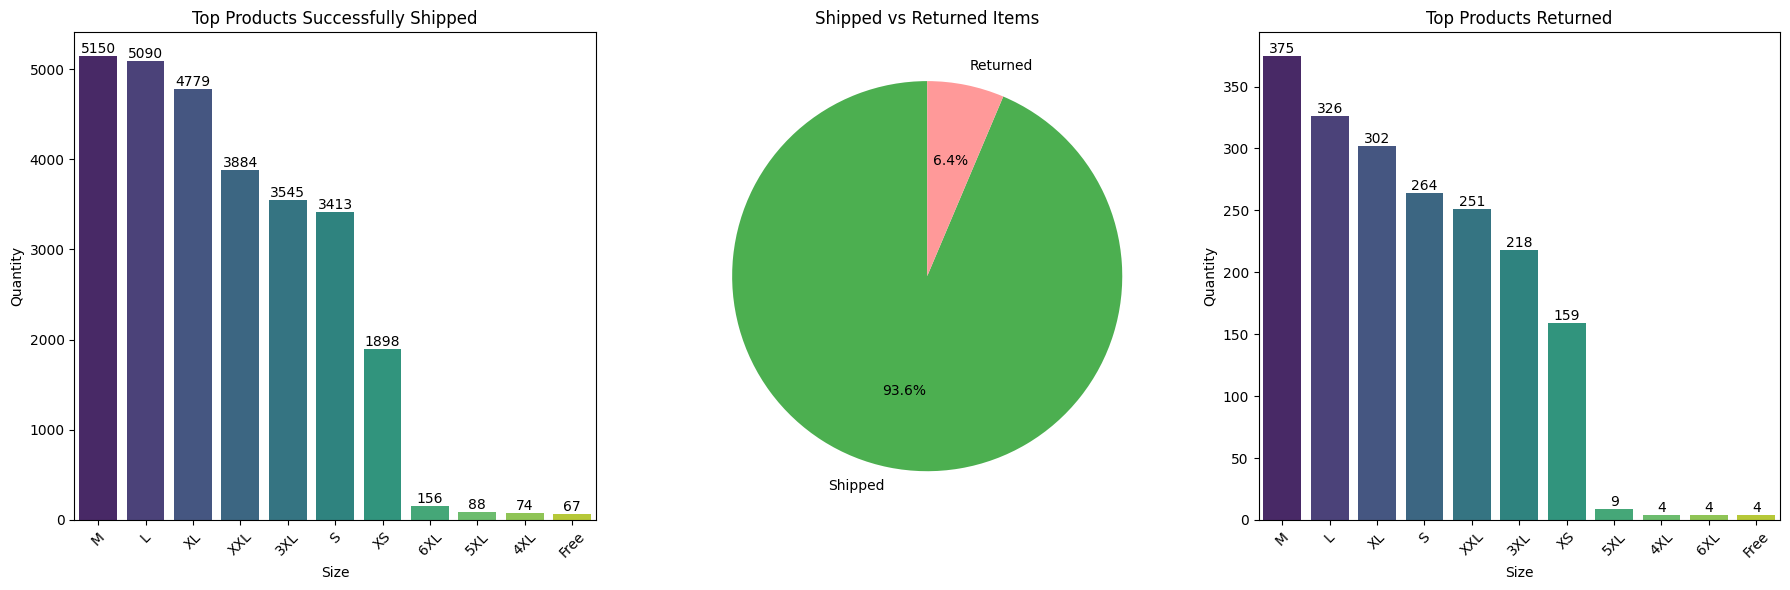

In [39]:
# Filter out the shipped and returned products
shipped = df[df['Status'] == 'Shipped - Delivered to Buyer']
returned = df[df['Status'] == 'Shipped - Returned to Seller']

# Calculate shipped items per category
shipped_items = shipped.groupby('Size')['Qty'].sum().sort_values(ascending=False).reset_index()

# Calculate returned items per category
returned_items = returned.groupby('Size')['Qty'].sum().sort_values(ascending=False).reset_index()

# Calculate total shipped and returned quantities for the pie plot
total_shipped = shipped['Qty'].sum()
total_returned = returned['Qty'].sum()

# Pie chart data
pie_labels = ['Shipped', 'Returned']
pie_sizes = [total_shipped, total_returned]
pie_colors = ['#4CAF50', '#FF9999']

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Barplot of products successfully shipped
sns.barplot(x='Size', y='Qty', data=shipped_items, ax=axes[0], palette='viridis')
axes[0].set_title('Top Products Successfully Shipped')
axes[0].set_xlabel('Size')
axes[0].set_ylabel('Quantity')
axes[0].tick_params(axis='x', rotation=45)
for container in axes[0].containers:
    axes[0].bar_label(container)

# Plot 2: Pie chart of shipped vs returned
axes[1].pie(pie_sizes, labels=pie_labels, colors=pie_colors, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Shipped vs Returned Items')

# Plot 3: Barplot of products returned
sns.barplot(x='Size', y='Qty', data=returned_items, ax=axes[2], palette='viridis')
axes[2].set_title('Top Products Returned')
axes[2].set_xlabel('Size')
axes[2].set_ylabel('Quantity')
axes[2].tick_params(axis='x', rotation=45)
for container in axes[2].containers:
    axes[2].bar_label(container)

# Adjust layout
plt.tight_layout()
plt.show()


`Observation`
- Like the categories, here we can see the same pattern in the sizes too
- The most bought is Medium size and most returned size
- Mismatch in size chart may lead to such cases
- Platform should maintain exact size chart for customers to measure the preference
- Sometimes medium come out to be small or large. To avoid this platform should maintain size charts to dealers.

# <FONT COLOR='dARKBLUE'> <CENTER> CONCLUSION

**Based on the detailed observations from the data analysis, several key insights have been identified about customer purchase behaviors, product performance, and fulfillment efficiency. Here are the consolidated conclusions:**

### Purchase Patterns and Customer Preferences:

1. High Sales Volumes: Maharashtra and Karnataka lead in sales volumes, with - Bengaluru and Hyderabad being the top cities.

2. Popular Products: Sets and Kurtas are the highest revenue-generating products, indicating a strong preference for these items during festive seasons like Ugadi.
3. Size Preferences: Medium size products are the most purchased, reflecting a common customer preference.



### Fulfillment Efficiency:

1. High Fulfillment Rate: 94.4% of orders are shipped successfully, demonstrating effective fulfillment processes.
Dominant Fulfillment Method: Amazon's fulfillment service dominates with 72.2% of orders, compared to 27.8% by merchants.
Return Rates and Customer Satisfaction:

2. Return Rates: The overall return rate is low, with only 6.5% of products being returned, indicating high customer satisfaction.
3. Commonly Returned Items: Sets and Kurtas have the highest return rates, suggesting potential issues with these products, possibly related to size or quality.

4. Sales Channels and Pricing:

5. Dominant Sales Channel: B2B sales account for around 90% of total sales, highlighting the importance of bulk purchases in the business model.
6. Product Pricing: Products like Sets and Kurtas are priced affordably, which drives their high sales volumes.
7. Purchase and Return Behavior by Region:

8. High Return Regions: Maharashtra and Uttar Pradesh have the highest return rates, with Bangalore and Hyderabad being the top cities for returns.
9. Size and Return Rates: Medium-sized products are both the most purchased and most returned, indicating potential issues with size accuracy.

 # <FONT COLOR='dARKBLUE'> <CENTER> RECOMMENDATIONS

**1. Improve Product Quality and Description:**

- Ensure detailed and accurate product descriptions to reduce return rates. This includes providing comprehensive size charts and quality indicators.
Conduct quality checks for high-return items like Sets to identify and address any recurring issues.

**2. Enhance Fulfillment Processes:**

- Maintain the high standards of fulfillment and explore ways to improve the 5.6% of orders that are not shipped successfully. Investigate reasons for cancellations and implement solutions to mitigate these issues.

**3. Optimize Pricing and Promotions:**

- Continue offering competitive pricing for popular items like Sets and Kurtas to maintain high sales volumes.
Implement targeted promotions during festive seasons to capitalize on increased customer spending.

**4. Focus on Customer Feedback:**

- Collect and analyze customer feedback, especially for high-return products and regions, to understand and address customer dissatisfaction.
Implement a feedback loop where customers can easily report issues with product sizes or quality.

**5. Regional Sales Strategies:**

- Develop region-specific marketing strategies for high-performing states like Maharashtra and Karnataka to further boost sales.
Address the higher return rates in regions like Bangalore and Hyderabad by providing better product information and customer support.

**6. Refine Size Charts:**

- Work with manufacturers to ensure size charts are accurate and consistent. Consider providing detailed measurement guides to help customers choose the correct size.